## Desafío 1 - Regresión desde la Econometría
* Autor: Walther Becks

### Desafío 1: Prepare el ambiente de trabajo
* Importe las librerías básicas para el análisis de datos.
* Incluya los import base de statsmodels.
* Importe la base de datos Credit.csv y elimine la columna Unnamed: 0.
* Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity, genere binarias para African American, Caucasian y Asian. 
    * tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.


In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

In [5]:
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams["figure.dpi"] = 200

In [22]:
df = pd.read_csv('Credit.csv')
df.drop('Unnamed: 0',1,inplace=True)
df['Gender'] = df['Gender'].str.strip()
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [23]:
df['Male'] = np.where(df['Gender'] == 'Male',1,0)
df['Student'] = np.where(df['Student'] == 'Yes',1,0)
df['AfrAmerican'] = np.where(df['Ethnicity'] == "African American",1,0)
df['Asian'] = np.where(df['Ethnicity'] == "Asian",1,0)
df['Married'] = np.where(df['Married'] == "Yes",1,0)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Male,AfrAmerican,Asian
0,14.891,3606,283,2,34,11,Male,0,1,Caucasian,333,1,0,0
1,106.025,6645,483,3,82,15,Female,1,1,Asian,903,0,0,1
2,104.593,7075,514,4,71,11,Male,0,0,Asian,580,1,0,1
3,148.924,9504,681,3,36,11,Female,0,0,Asian,964,0,0,1
4,55.882,4897,357,2,68,16,Male,0,1,Caucasian,331,1,0,0


In [26]:
print(df['Male'].value_counts())
print(df['Student'].value_counts())
print(df['AfrAmerican'].value_counts())
print(df['Asian'].value_counts())
print(df['Married'].value_counts())


0    207
1    193
Name: Male, dtype: int64
0    360
1     40
Name: Student, dtype: int64
0    301
1     99
Name: AfrAmerican, dtype: int64
0    298
1    102
Name: Asian, dtype: int64
1    245
0    155
Name: Married, dtype: int64


### Desafío 2: Genere gráficos descriptivos para las variables continuas
* Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. Agregue una leyenda para indicar qué representa cada línea.
* ¿Cuál es el comportamiento de Balance, Income, Cards y Rating?

In [29]:
def plot_hist(df,var):
    tmp_mean = np.mean(df[var])
    tmp_median = np.median(df[var])
    
    plt.hist(df[var],color='dodgerblue',alpha=.7)
    plt.axvline(tmp_mean,color='tomato',label=f'Media {round(tmp_mean,2)}')
    plt.axvline(tmp_median,color='orange',label=f'Mediana {round(tmp_median,2)}')
    
    plt.title(f"Histograma para {var}")
    plt.legend()
    

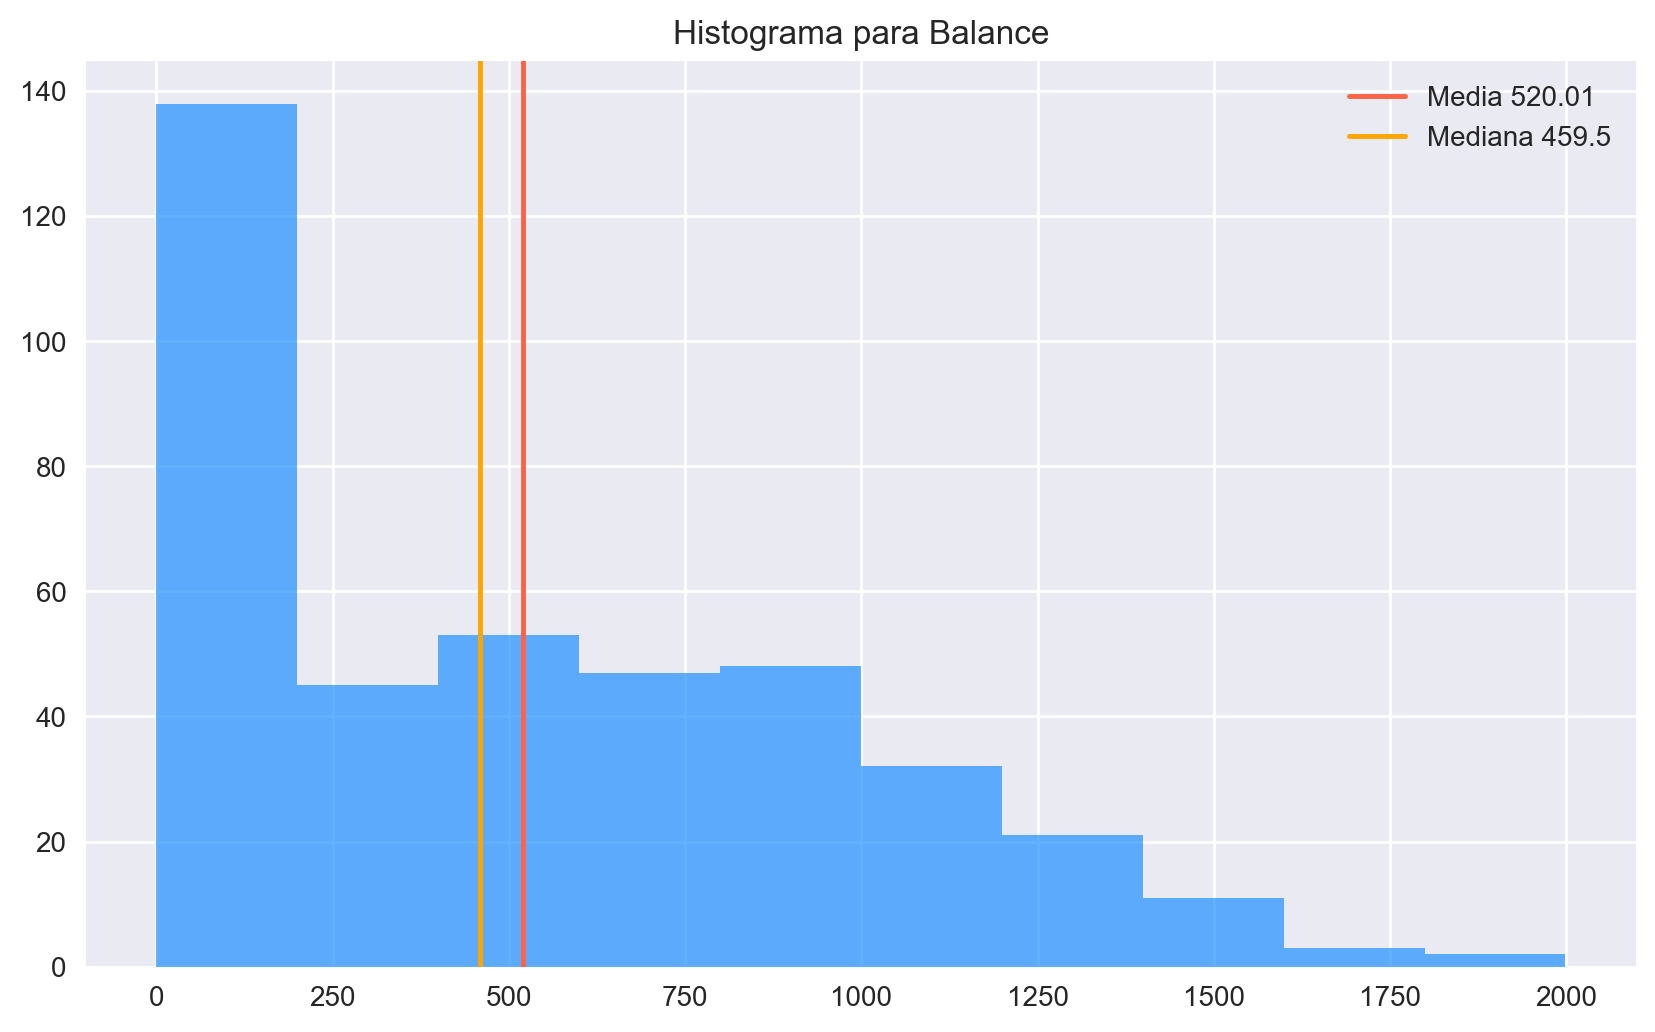

In [30]:
plot_hist(df,'Balance')

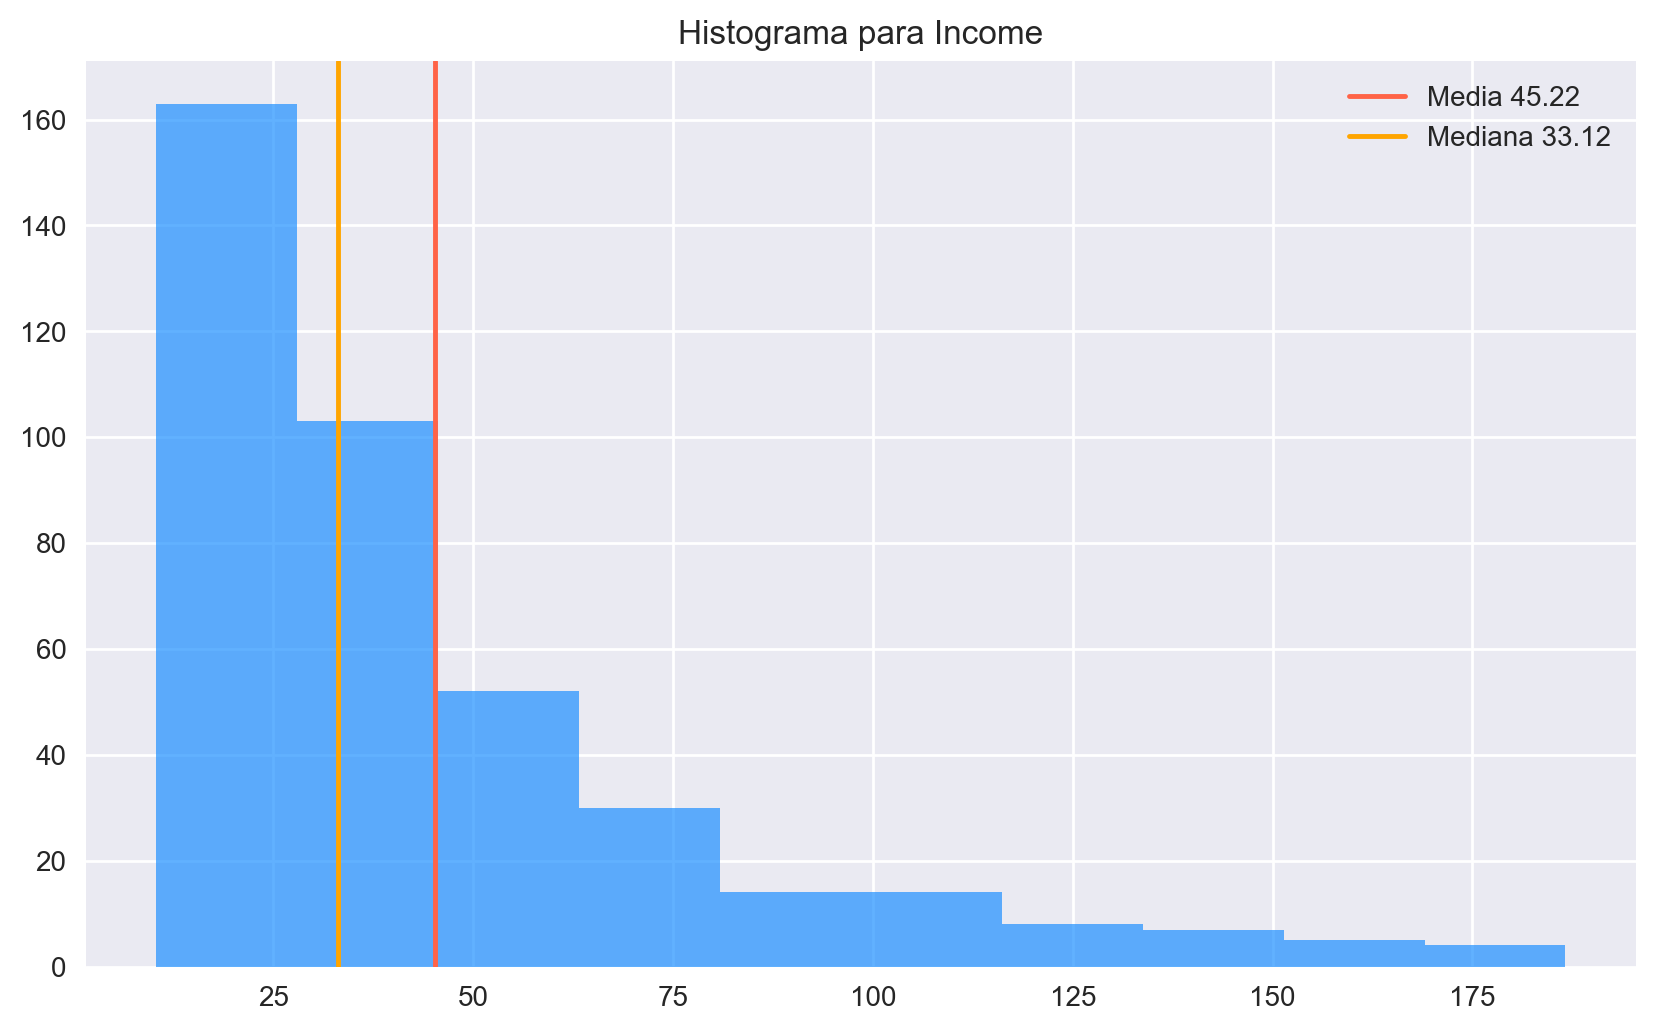

In [31]:
plot_hist(df,'Income')

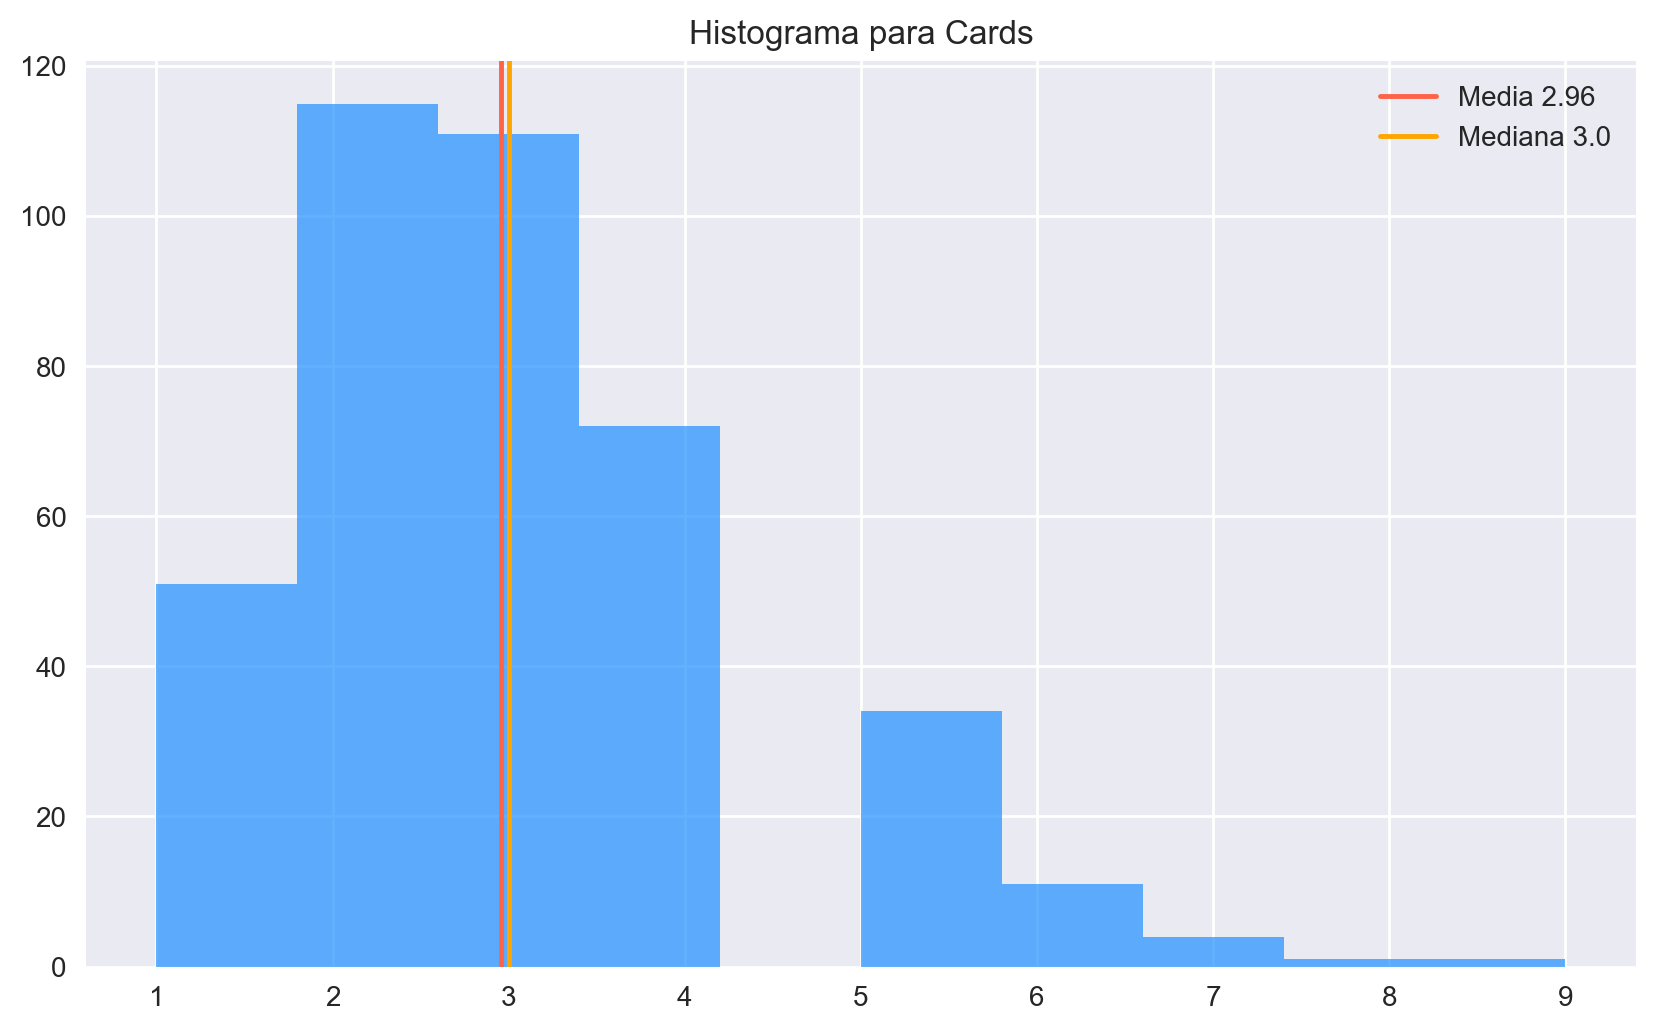

In [32]:
plot_hist(df,'Cards')

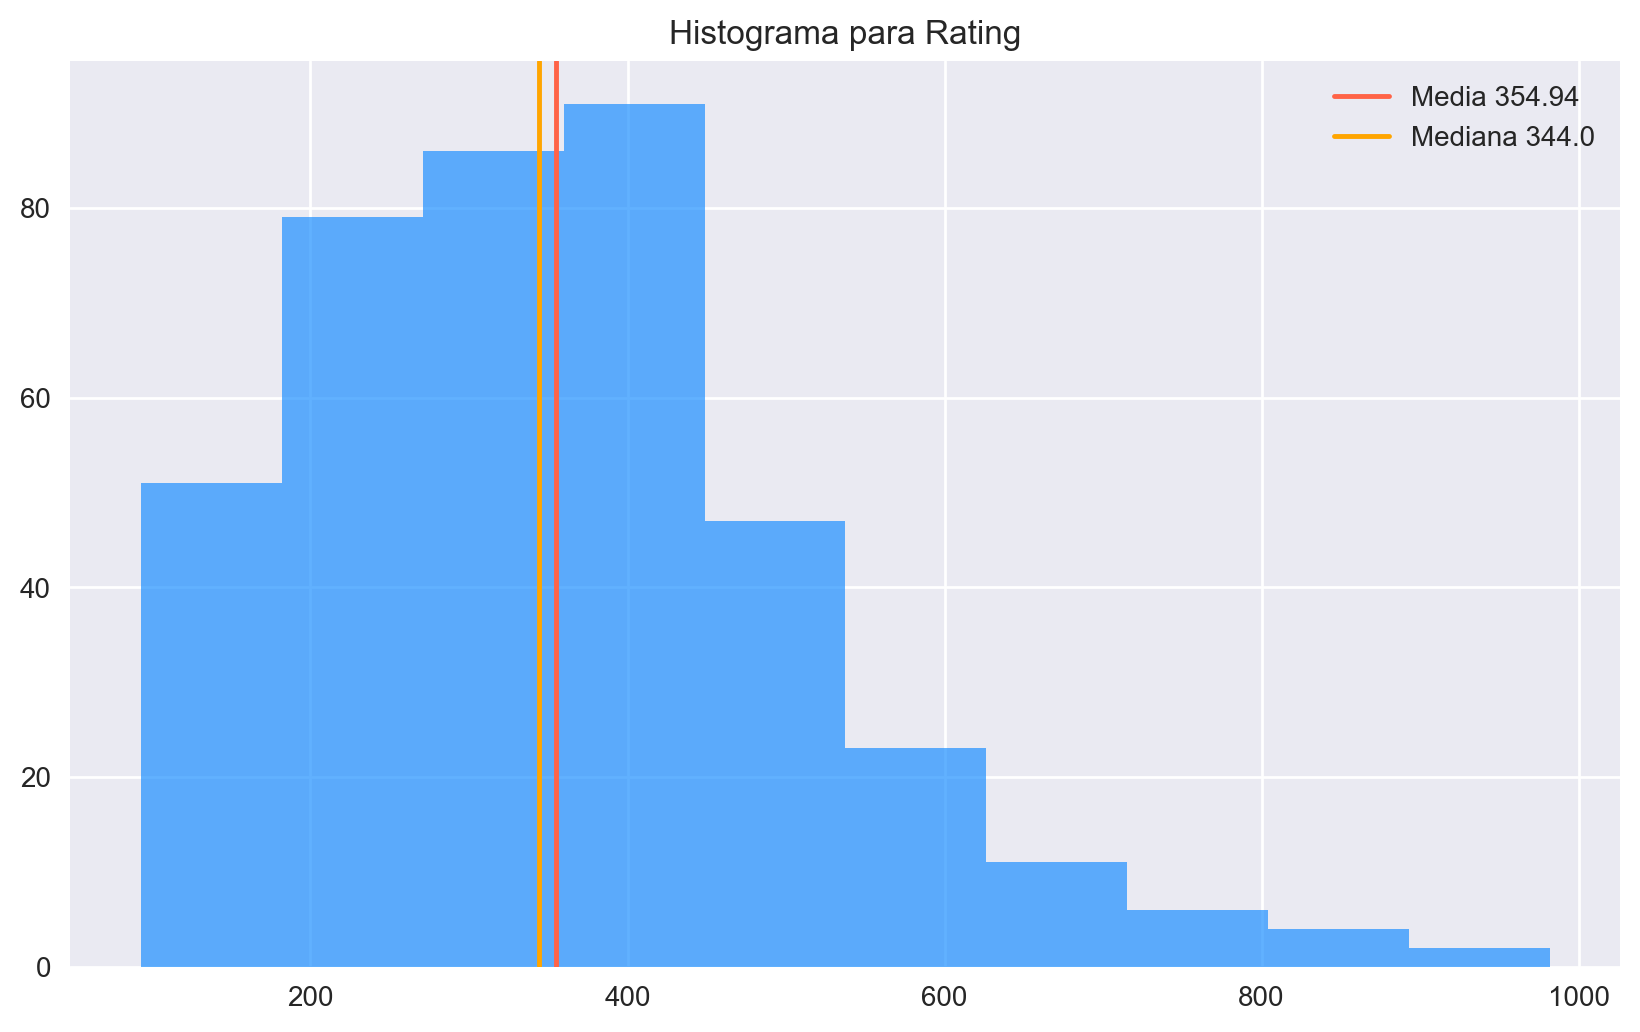

In [33]:
plot_hist(df,'Rating')

## Desafío 3: Regresión Lineal Simple
* A continuación generaremos una serie de modelos simples: 
𝐵𝑎𝑙𝑎𝑛𝑐𝑒 = β
0 + γ
1
· 𝑆𝑡𝑢𝑑𝑒𝑛𝑡 + ε
𝐵𝑎𝑙𝑎𝑛𝑐𝑒 = β
0 + β · 𝐼𝑛𝑐𝑜𝑚𝑒 + ε
𝐵𝑎𝑙𝑎𝑛𝑐𝑒 = β
0 + β · 𝑅𝑎𝑡𝑖𝑛𝑔 + ε
* Utilizando statsmodels, comente brevemente los siguientes puntos:
    * ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance?
    * ¿Qué podemos decir sobre el comportamiento de Student?
        * ¿Qué pasa si aplicamos una prueba de hipotesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?


In [34]:
model_income = smf.ols('Balance ~ Income',df).fit()
model_student = smf.ols('Balance ~ Student',df).fit()
model_rating = smf.ols('Balance ~ Rating',df).fit()

In [35]:
model_income.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sun, 08 May 2022   Prob (F-statistic):           1.03e-22
Time:                        22:41:56   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Walther\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Walther\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Walther\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Walther\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensiona

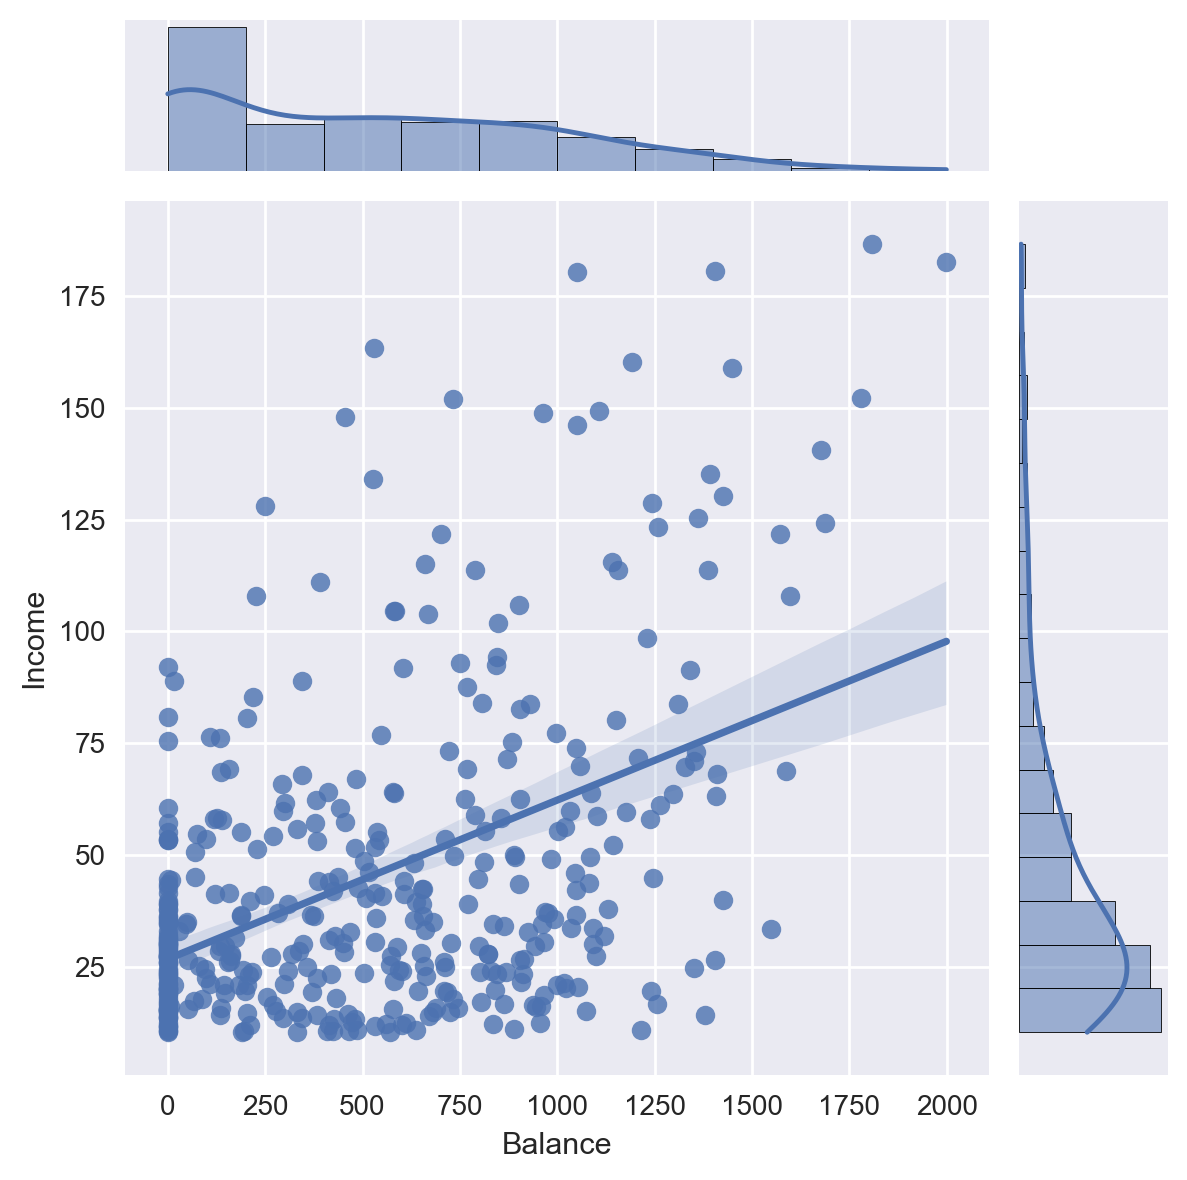

In [41]:
sns.jointplot(df['Balance'],df['Income'],kind='reg')

In [36]:
model_student.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Sun, 08 May 2022   Prob (F-statistic):           1.49e-07
Time:                        22:42:53   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    480.3694     23.434     20.499      0.000     434.300     526.439
Student      396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Walther\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Walther\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Walther\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Walther\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensiona

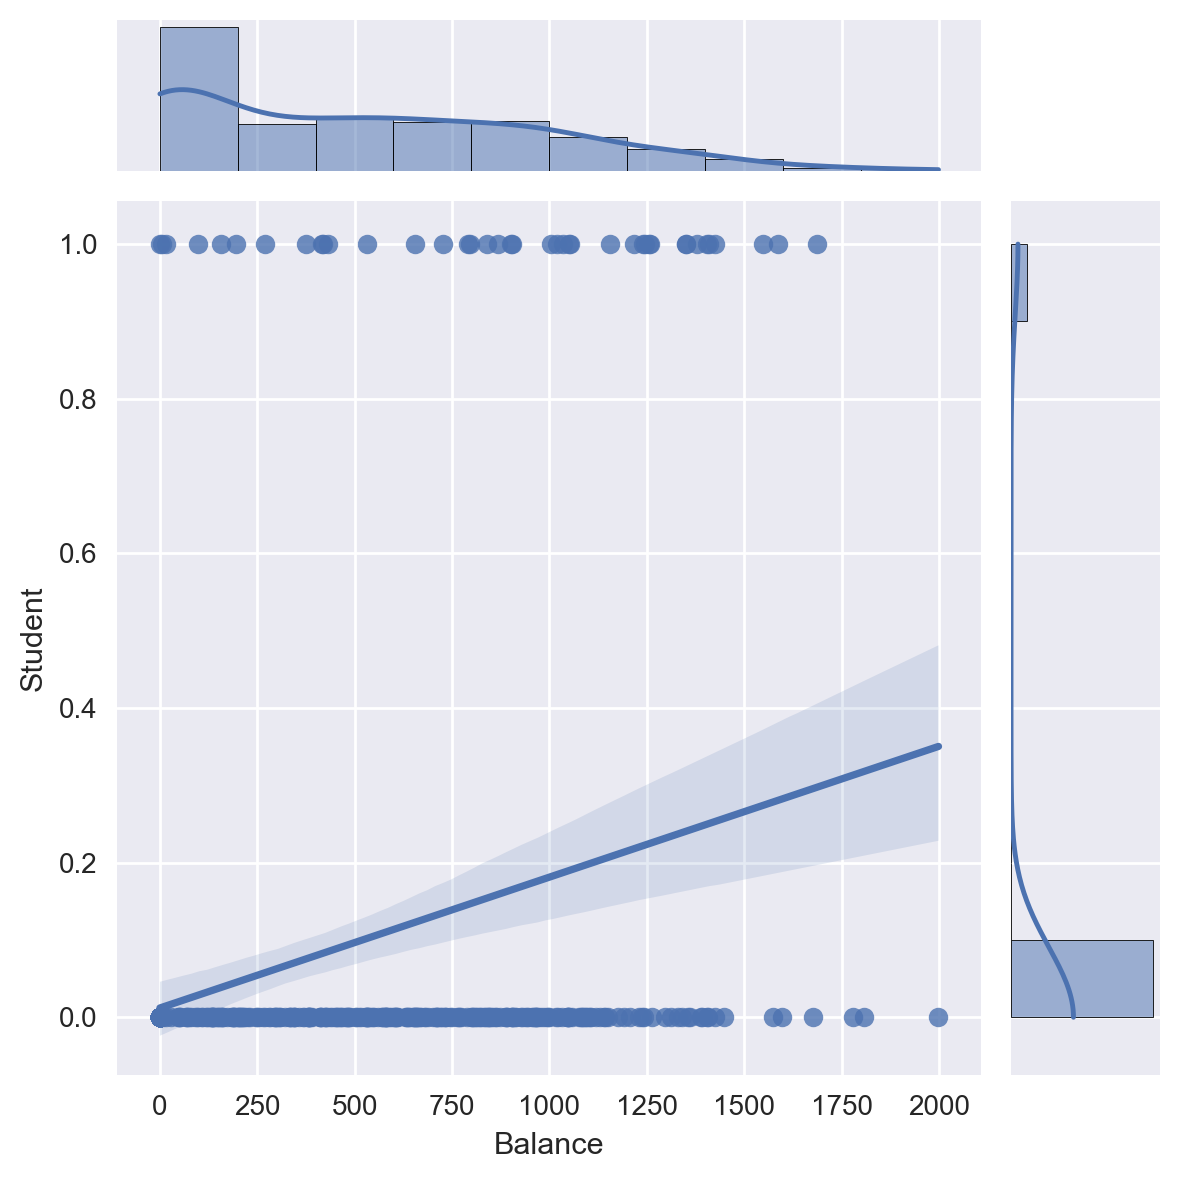

In [40]:
sns.jointplot(df['Balance'],df['Student'],kind='reg')

In [37]:
model_rating.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.90e-120
Time:                        22:43:00   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Walther\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Walther\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Walther\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Walther\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensiona

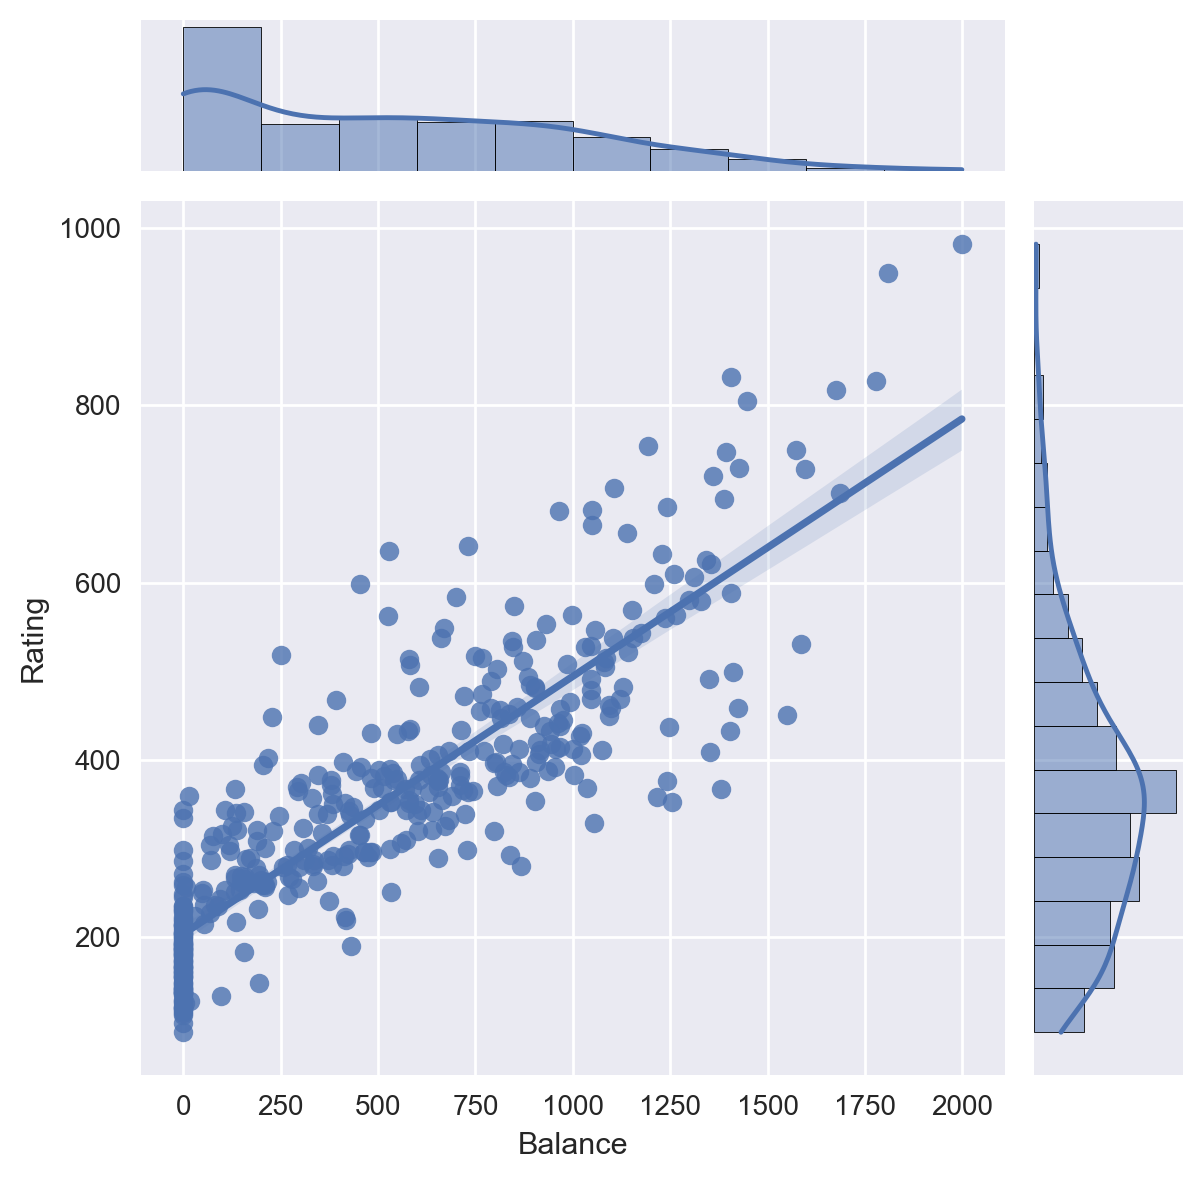

In [39]:
sns.jointplot(df['Balance'],df['Rating'],kind='reg')

In [3]:
print("Podemos observar que la variable de rating explica en un 74.6% la variabilidad del balance de una cuenta, siendo esta la mejor. Aún así cabe mencionar que la variable balance representa bastante decentemente la muestra con un 21.5%, la diferencia sustancial de estos resultados es que Rating es una variable creada de múltiples variables, lo que hace lógico pensar que la describe mejor")

Podemos observar que la variable de rating explica en un 74.6% la variabilidad del balance de una cuenta, siendo esta la mejor. Aún así cabe mencionar que la variable balance representa bastante decentemente la muestra con un 21.5%, la diferencia sustancial de estos resultados es que Rating es una variable creada de múltiples variables, lo que hace lógico pensar que la describe mejor


### Desafío 4: Generar un modelo que incluya todos los regresores
𝐵𝑎𝑙𝑎𝑛𝑐𝑒
𝑖 = β
0 +
𝑗=1
𝑁
∑ β
𝑗
· 𝑋
𝑖𝑗 + ε
𝑖
*  Comente brevemente sobre el poder explicativo en la varianza de 𝑦 y las principales características de los predictores

In [58]:
model_total = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Male + Student + Married + AfrAmerican + Asian',df).fit()

In [59]:
model_total.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.11e-253
Time:                        23:41:36   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -479.7541     34.717    -13.819      0.000    -548.012    -411.497
Income         -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit           0.1909      0.033      5.824      0.000       0.126       0.255
Rating          1.1365      0.491      2.315      0.021       0.171       2.102
Cards          17.7245      4.341      4.083      0.000       9.190      26.259
Age            -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education      -1.0989      1.598     -0.688      0.492      -4.241       2.043
Male           10.6532      9.914      1.075      0.283      -8.839      30.145
Student       425.7474     16.723     25.459      0.000     392.869     458.626
Married        -8.5339     10.363     -0.824      0.411     -28.908      11.841
AfrAmerican   -10.1070     12.210     -0.828      0.408     -34.113      13.899
Asian           6.6972     12.122      0.552      0.581     -17.137      30.531
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
print("El modelo explica bien la relación con el nivel de deuda(con un R cuadrado de 95.5%) y los regresores que funcionan son: Income, Limit, Rating, Cards y Student ya que estas variables no pasan por el 0 con un 95% de confianza por lo que demuestra que si tienen impacto en el Balance o deuda de las personas")

El modelo explica bien la relación con el nivel de deuda(con un R cuadrado de 95.5%) y los regresores que funcionan son: Income, Limit, Rating, Cards y Student ya que estas variables no pasan por el 0 con un 95% de confianza por lo que demuestra que si tienen impacto en el Balance o deuda de las personas


### Desafío 5: Depure el modelo e incluya sólo los predictores significativo
* En base al modelo anterior, refactoriza e incluya sólo las variables con un nivel de significancia 𝑝 − 𝑣𝑎𝑙𝑢𝑒 ≤. 025. Comente brevemente sobre el poder explicativo en la varianza de 𝑦 y las principales características de los predictores.
* ¿Mejoró o empeoró el modelo con la reducción de regresores?


In [63]:
model_2 = smf.ols('Balance ~ Income + Limit + Rating + Cards + Student',df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Sun, 08 May 2022   Prob (F-statistic):          3.60e-261
Time:                        23:56:48   Log-Likelihood:                -2402.8
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -526.1555     19.747    -26.645      0.000    -564.977    -487.334
Income        -7.8749      0.231    -34.024      0.000      -8.330      -7.420
Limit          0.1944      0.033      5.977      0.000       0.130       0.258
Rating         1.0879      0.487      2.234      0.026       0.130       2.045
Cards         17.8517      4.335      4.118      0.000       9.329      26.374
Student      426.8501     16.574     25.754      0.000     394.266     459.435
==============================================================================
Omnibus:                       30.263   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.257
Skew:                           0.722   Prob(JB):                     2.21e-08
Kurtosis:                       3.179   Cond. No.                     2.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
print("El modelo predice igual de bien que el anterior, se rechaza la hipótesis nula de que todos los coeficientes son iguales a 0")

El modelo predice igual de bien que el anterior, se rechaza la hipótesis nula de que todos los coeficientes son iguales a 0


### Desafío 6
* Utilizando lmplot de seaborn, inspeccione el comportamiento de los tres
principales determinantes.

C:\Users\Walther\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


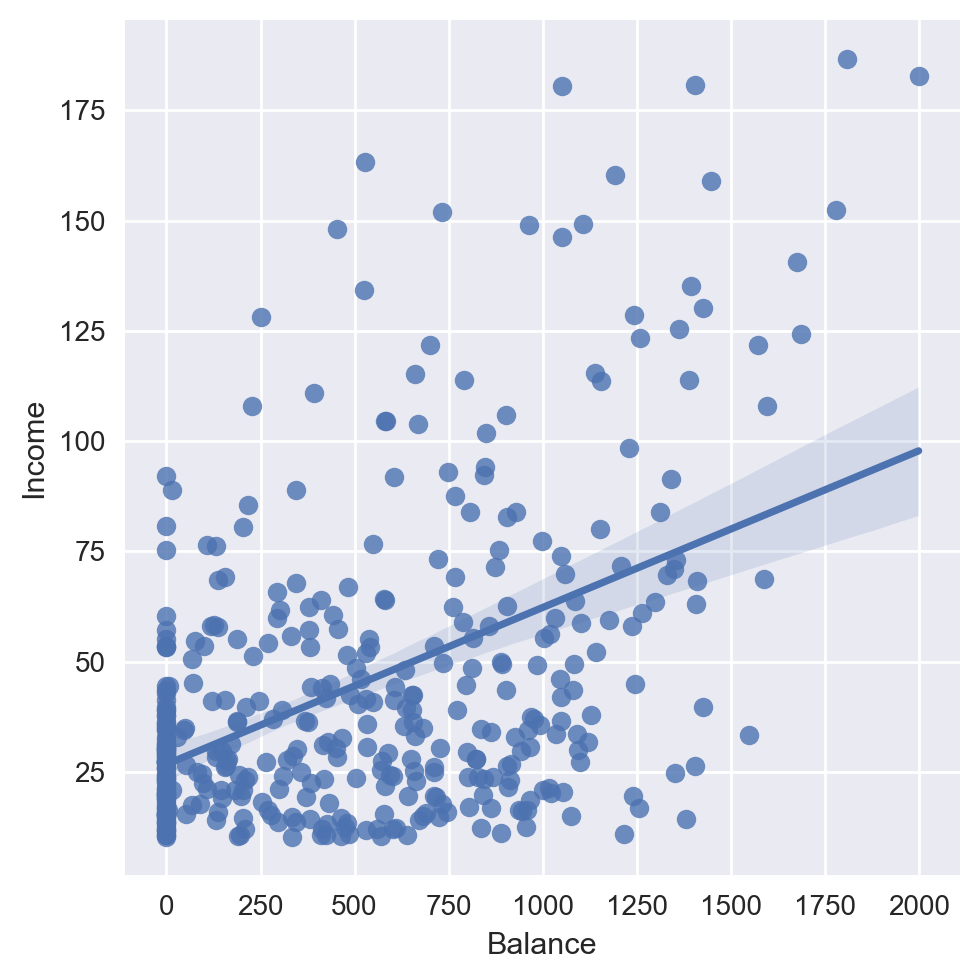

In [68]:
sns.lmplot('Balance','Income',df)

C:\Users\Walther\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


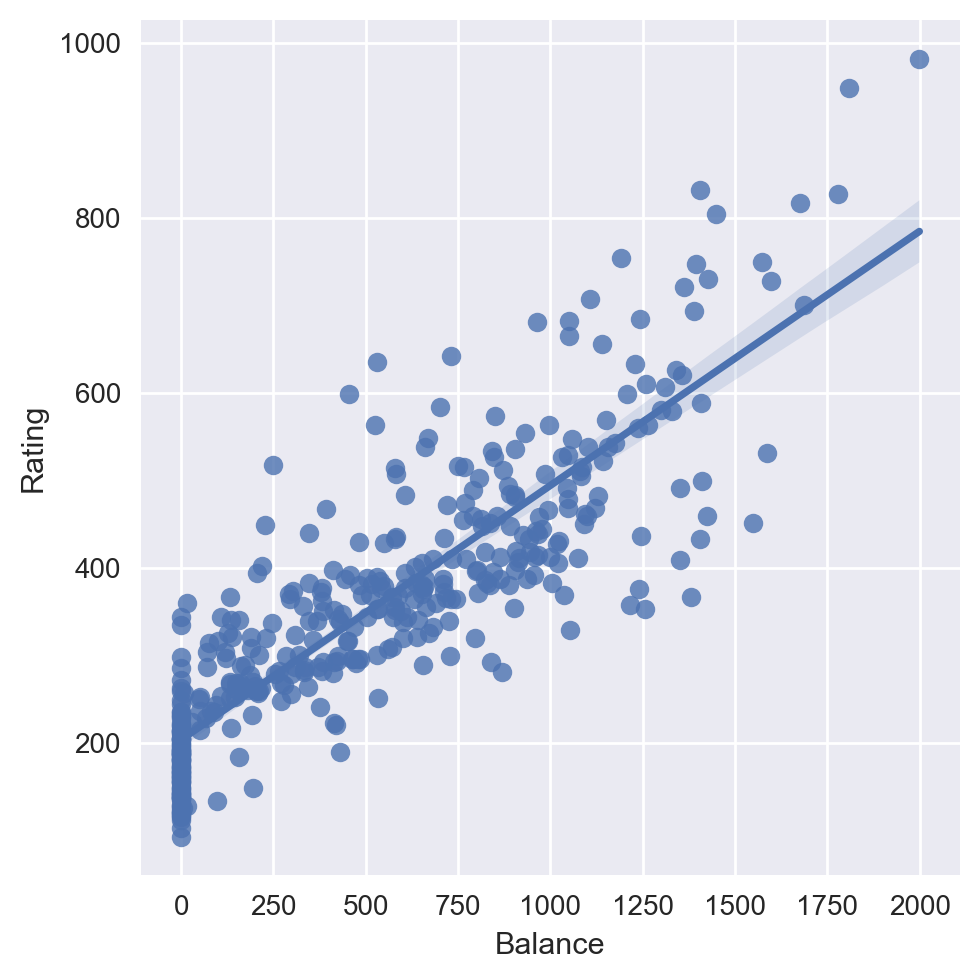

In [69]:
sns.lmplot('Balance','Rating',df)

C:\Users\Walther\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


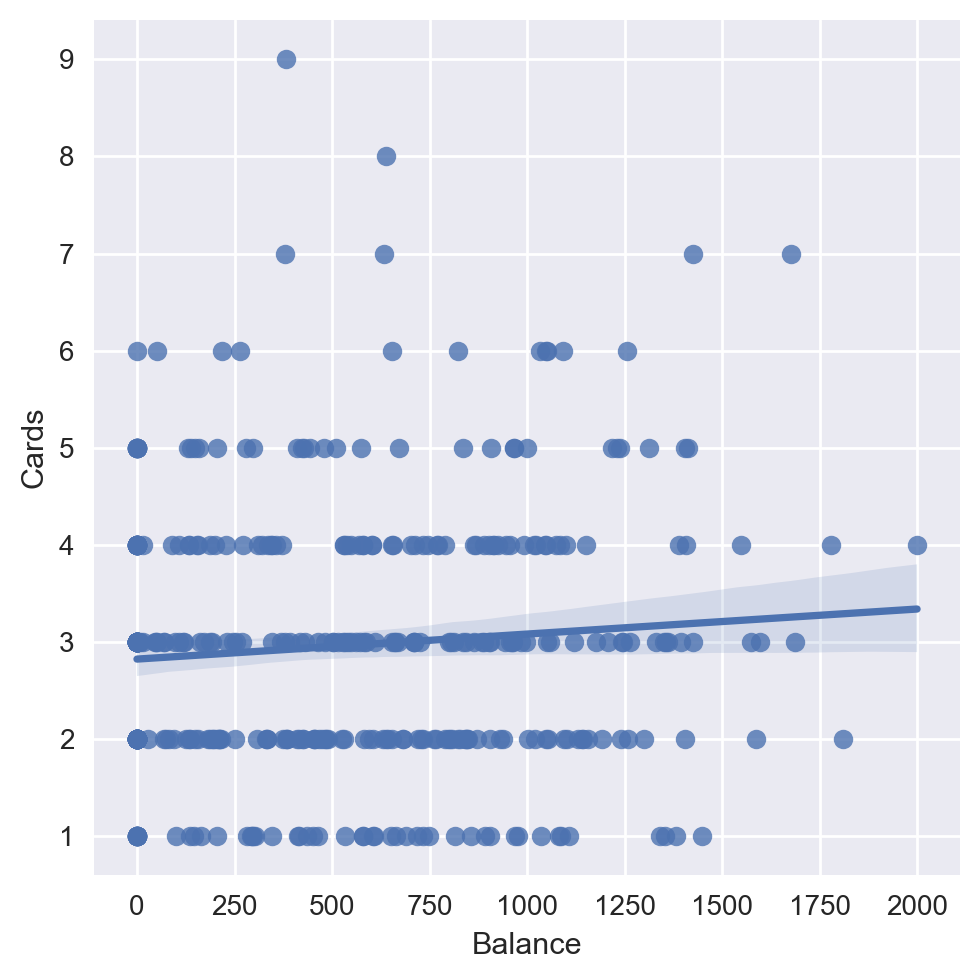

In [70]:
sns.lmplot('Balance','Cards',df)

C:\Users\Walther\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


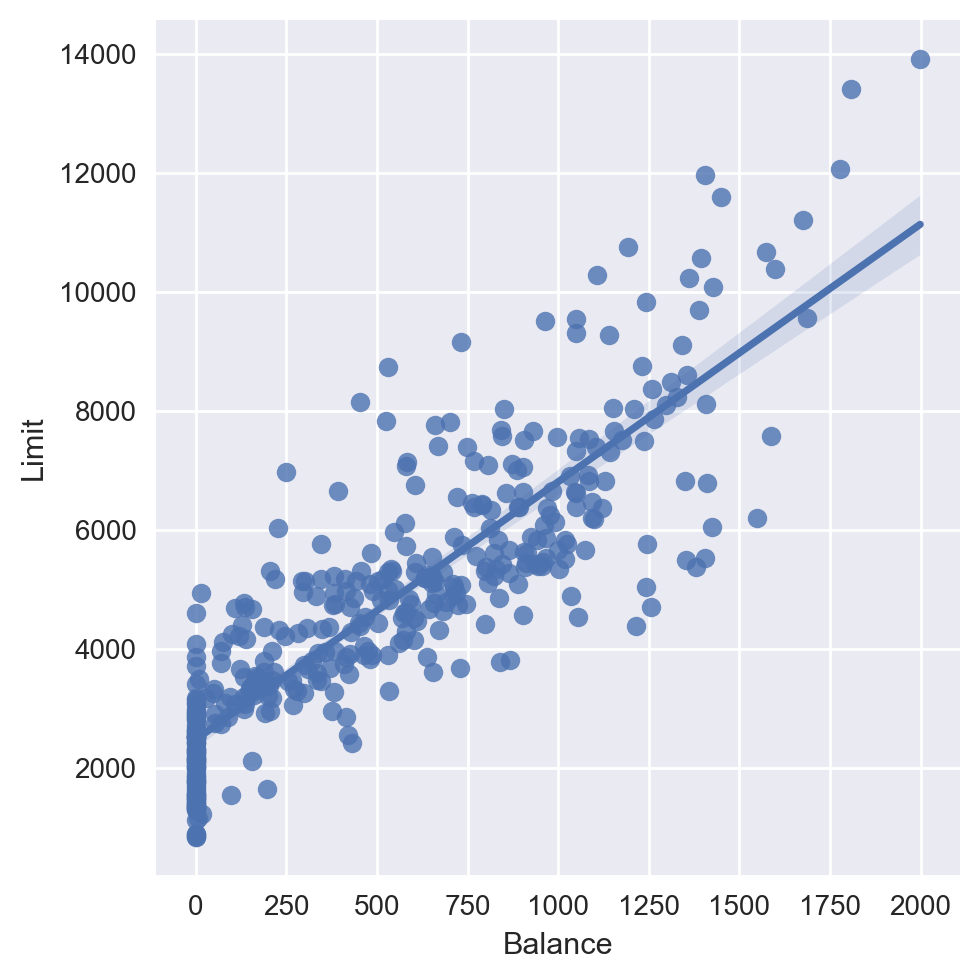

In [73]:
sns.lmplot('Balance','Limit',df)